In [10]:
%matplotlib inline


# Varying regularization in Multi-layer Perceptron

A comparison of different values for regularization parameter 'alpha' on
synthetic datasets. The plot shows that different alphas yield different
decision functions.

Alpha is a parameter for regularization term, aka penalty term, that combats
overfitting by constraining the size of the weights. Increasing alpha may fix
high variance (a sign of overfitting) by encouraging smaller weights, resulting
in a decision boundary plot that appears with lesser curvatures.
Similarly, decreasing alpha may fix high bias (a sign of underfitting) by
encouraging larger weights, potentially resulting in a more complicated
decision boundary.


[[ 0.26657401  1.34856054]
 [ 2.45422481  0.82376731]
 [ 2.62111035  1.7605275 ]
 [ 1.84591192  2.04618256]
 [ 1.32097884  1.70181469]
 [ 3.97616763 -1.07822436]
 [ 2.70215442 -0.4600292 ]
 [ 2.40471028  2.59745805]
 [ 2.97981765 -0.51666779]
 [ 2.62307329  1.26492508]
 [ 0.93817538  1.21018976]
 [-0.42304024  0.04216385]
 [ 0.6277561   2.20404133]
 [ 0.02926242  1.08553126]
 [ 1.96878825 -1.08308565]
 [-0.75383879  0.52390554]
 [ 1.63198686  2.07061346]
 [ 2.18329097 -0.00614472]
 [ 3.0372504   2.38575638]
 [-0.1407164   2.25997053]
 [ 1.727912    0.91004531]
 [ 2.97275204  1.85001866]
 [ 1.55863334  1.66522927]
 [ 2.14129893  2.28276851]
 [ 2.25482302  2.82825674]
 [ 0.62401835  1.1031466 ]
 [ 0.7098867   2.52953583]
 [-0.3257527   0.10139928]
 [ 2.29971062 -0.51489635]
 [ 4.4762742  -0.56659927]
 [ 2.57917287  0.55241145]
 [ 2.38699647  1.1401204 ]
 [ 1.97565903 -0.16157646]
 [ 3.18909495 -1.54145946]
 [ 1.99387933 -0.59338754]
 [ 2.10080345 -1.46505034]
 [ 0.92645898 -0.44437249]
 

[[ 3.0372504   2.38575638]
 [ 2.57917287  0.55241145]
 [ 1.54268444  1.17220476]
 [ 3.18909495 -1.54145946]
 [ 2.70959088  1.85796337]
 [ 1.32097884  1.70181469]
 [ 1.40193163  2.05023291]
 [ 0.30942087  1.32753258]
 [ 0.6277561   2.20404133]
 [ 2.38699647  1.1401204 ]
 [ 2.47962644  2.70880641]
 [ 0.69116769  2.93891299]
 [ 0.7098867   2.52953583]
 [ 1.37230547 -0.21510445]
 [ 2.22193538  1.61834005]
 [-0.75383879  0.52390554]
 [ 2.50940302 -1.63655555]
 [ 1.83312311  1.72808006]
 [ 2.62307329  1.26492508]
 [ 3.37864805 -0.4437567 ]
 [-0.42304024  0.04216385]
 [ 1.44313893  0.17178868]
 [ 2.21501391 -1.63158286]
 [ 2.29971062 -0.51489635]
 [ 2.48588478  1.45900665]
 [ 3.97616763 -1.07822436]
 [ 2.31258274  1.38548661]
 [ 1.05640156  1.41895385]
 [ 2.10080345 -1.46505034]
 [ 1.63198686  2.07061346]
 [ 0.37064886  1.49316623]
 [ 1.99387933 -0.59338754]
 [ 2.40471028  2.59745805]
 [ 3.3146022   1.08854166]
 [-0.3257527   0.10139928]
 [-0.1407164   2.25997053]
 [ 0.10870087  1.87061985]
 

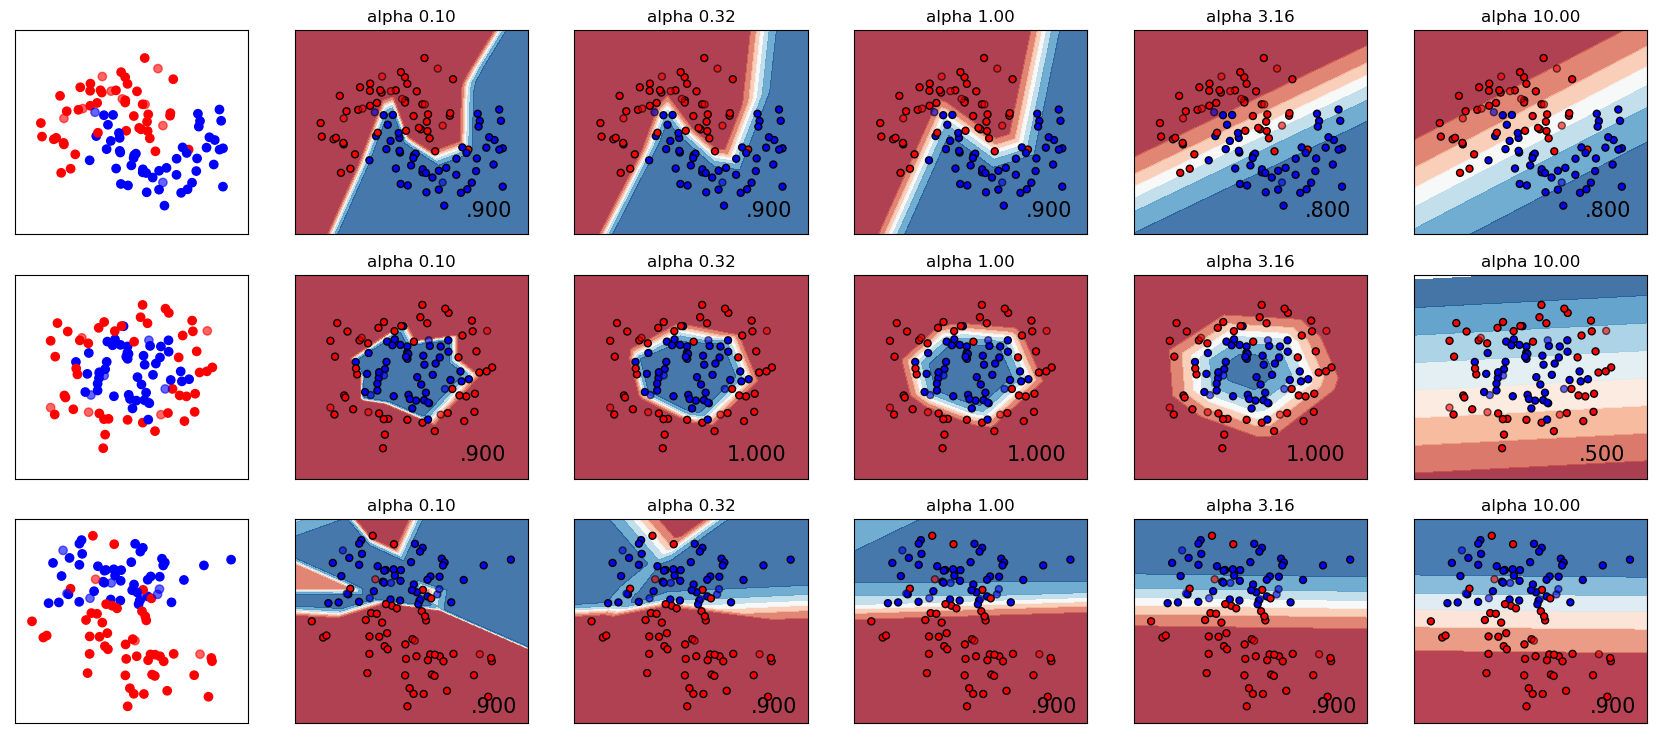

In [11]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
print(X)
print(y)
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )
    print(X_train)
    print('**********')
    print(X_test)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()